# LAB 2: Clustering

Disclaimer: This notebook is based and reproduces information from chapter 10 of the book [An Introduction to Statistical Learning with Applications in R](http://www-bcf.usc.edu/~gareth/ISL/) written by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. All rights of the material belong to the authors.

## Clustering methods

- Clustering looks to find homogeneous subgroups among the observations

    - It seeks to partition observations into distinct groups so that the observations within each group are quite similar, while observations in different groups are quite different.
    

- We can cluster observations on the basis of the features in order to identify subgroups among the observations, or we can cluster features on the basis of the observations in order to discover subgroups among the features.


- Most known clustreing methods:

    - k-means clustering
    - hierarchical clustering

## K-means clustering

- In K-means clustering, we seek to partition the observations into a pre-specified number of clusters


- The sets of k-means satisfy two properties:

    - Each observation belongs to at least one of the K clusters
    - The clusters are non overlapping --> no observation belongs to more than one cluster


- A good clustering is one for which the within-cluster variation is as small as possible

    - The measure W(Ck) is the amount by which the observations within a cluster differ from each other
    - We want to partition the observations into K clusters such that the total within-cluster variation, summed over all K clusters, is as small as possible. That is: 
    
![image_k_means.png](../images/k-means.png)

### Within cluster variation

- There are many possible ways to define within cluster variation, but by far the most common choice involves squared Euclidean distance
    - The within-cluster variation for the kth cluster is the sum of all of the pairwise squared Euclidean distances between the observations in the kth cluster, divided by the total number of observations in the kth cluster:
![image_eucledian_distance.png](../images/eucledian_distance.png)
    - |Ck| denotes the number of observations in the kth cluster


### Algorithm to perform k-means

1. We must first specify the desired number of clusters K
2. The K-means algorithm will assign each observation to exactly one of the K clusters
3. Iterate until the cluster assignments stop changing:
    - (a) For each of the K clusters, compute the cluster centroid. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster
    - (b) Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).

![image_k_means_iteration.png](../images/k-means_iteration.png)

- When the result no longer changes, a local optimum has been reached
    - Because the K-means algorithm finds a local rather than a global optimum, the results obtained will depend on the initial (random) cluster assignment of each observation in Step 1
    - It is important to run the algorithm multiple times from different random initial configurations --> Then one selects the best solution (i.e. that for which the objective of minimizations is smallest)
    
![image_k_means_initial_config.png](../images/k-means_initial_config.png)

## Practical k-means clustering:

Let's run our own k-means clustering:

In [40]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

We are going to simulate data with 50 observations and 2 features. The first 25 rows will belong to one cluster, while the remaining will belong to another:

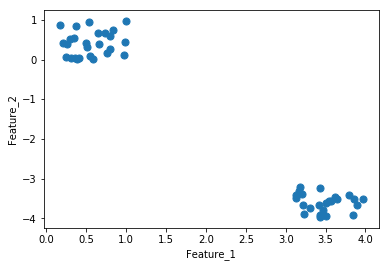

In [89]:
# Simulate data for clusters
random.seed(2)  # set seed to obtain the same results each time

np.random.seed(2)
X = np.random.rand(50,2)
X[0:24,0] = X[0:24,0] + 3
X[0:24,1] = X[0:24,1] - 4

# Plot our data
plt.scatter(X[:, 0], X[:, 1], 
            cmap='plasma', 
            s=50, alpha=1);
plt.xlabel("Feature_1");
plt.ylabel("Feature_2");

We have successfully created simualted data with two distinct clusters. Let's now perform k-means defining k=2 with 20 different initial configurations, and print the results:

Cluster labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]



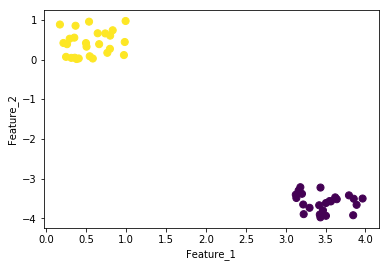

In [101]:
# Perform K-means clustering with K = 2 
kmeans = KMeans(n_clusters=2, n_init=20)  # n_init is the number of initial configurations
kmeans.fit(X)
kmeans_labels = kmeans.labels_
print('Cluster labels: \n' + str(kmeans_labels) + '\n')

# Plot k-means labels
plt.scatter(X[:, 0], X[:, 1], 
            c=kmeans_labels, 
            s=50, cmap='viridis')
plt.xlabel("Feature_1");
plt.ylabel("Feature_2");

As we can see, K-means found the real clusters in the data.

Let's examine the cluster centroids, which display the mean of each feature in each cluster:

           Feature_1  Feature_2
Cluster_1   3.478550  -3.596119
Cluster_2   0.546547   0.408241


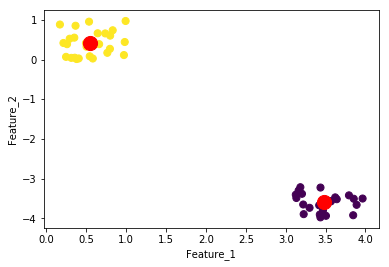

In [102]:
# Print cluster centroids
centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(centers,
                          index = ['Cluster_1', 'Cluster_2'],
                          columns = ['Feature_1', 'Feature_2'])
print(centers_df)

# Plot cluster centroids
plt.scatter(X[:, 0], X[:, 1], 
            c=kmeans_labels, 
            s=50, 
            cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', 
            s=200, alpha=1);
plt.xlabel("Feature_1");
plt.ylabel("Feature_2");

What happens if we define k = 3?

cluster labels with k = 3: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 2 2 0 0 0 2 0 0
 2 0 0 0 0 0 2 0 0 2 0 2 2]



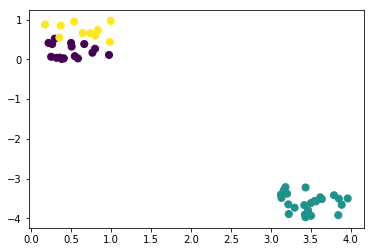

In [103]:
# Repeat with n-clusters 3
random.seed(4)

kmeans_3 = KMeans(n_clusters=3, n_init=20)
kmeans_3.fit(X)
kmeans_labels_3 = kmeans_3.labels_
print('cluster labels with k = 3: \n' + str(kmeans_labels_3) + '\n')

# Plot results
plt.scatter(X[:, 0], X[:, 1], 
            c=kmeans_labels_3, 
            s=50, 
            cmap='viridis');

If we define k = 3, one of the clusters gets divided into two.

What happens if we run k-means with the number of initial configurations set to 1? Does the performance of the clustering decrease compared to k-means with 20 initial configurations? We can measure the performance with the within-cluster sum of squares:

In [49]:
# Compare performance with n_init of 1 and n_init of 20
random.seed(3)
kmeans_init1 = KMeans(n_clusters=3, n_init=1)
kmeans_init1.fit(X)
init1_ss = kmeans_init1.inertia_
print('within cluster sum of squares for n_init=1: ' + str(init1_ss))

kmeans_init20 = KMeans(n_clusters=3, n_init=20)
kmeans_init20.fit(X)
init20_ss = kmeans_init20.inertia_
print('within cluster sum of squares for n_init=20: ' + str(init20_ss))

within cluster sum of squares for n_init=1: 5.556783687267402
within cluster sum of squares for n_init=20: 4.877531399471871


The sum of squares is a bit lower for the clustering with 20 different initial configurations, indicating better performance.

## Hierarchical clustering

- In hierarchical clustering, we do not know in advance how many clusters we want

- We end up with a tree-like visual representation of the observations, called a dendrogram, that allows us to view at once the clusterings obtained for each possible number of clusters, from 1 to n

- We will describe bottom-up or agglomerative clustering, which refers to the fact that a dendrogram is built starting from the leaves and combining clusters up to the trunk


### Interpreting a dendrogram

- This is a dedrogram from simulated data containing 3 clusters:

![image_hc_simulated-data.png](../images/hc_simulated-data.png)

![image_hc_dendrogram.png](../images/hc_dendrogram.png)


#### Leaves and branches
- Each leaf of the dendrogram represents one of the 45 observations 
- As we move up the tree, some leaves begin to fuse into branches. These correspond to observations that are similar to each other 
- As we move higher up the tree, branches themselves fuse, either with leaves or other branches 

#### Simmilarity of observations
- The earlier (lower in the tree) fusions occur, the more similar the groups of observations are to each other
- Observations that fuse near the top of the tree can be quite different 

- We cannot draw conclusions about the similarity of two observations based on their proximity along the horizontal axis
- We draw conclusions about the similarity of two observations based on the location on the vertical axis
    - For any two observations, we can look for the point in the tree where branches containing those two observations are first fused. The height of this fusion, as measured on the vertical axis, indicates how different the two observations are.  

#### Identifying clusters 
- To identify clusters based on a dedrogram, we make a horizontal cut across the dendrogram, and the distinct sets of observations beneath the cut can be interpreted as clusters

- The height of the cut controls the number of clusters obtained (similar as k in k-means clustering)

- One single dendrogram can be used to obtain any number of clusters

- In practice, people often look at the dendrogram and select by eye a sensible number of clusters, based on the heights of the fusion and the number of clusters desired

- The term hierarchical refers to the fact that clusters obtained by cutting the dendrogram at a given height are necessarily nested within the clusters obtained by cutting the dendrogram at any greater height

## The hierarchical clustering algorithm

1. Begin with n observations and a measure (such as Euclidean distance) of all the pairwise dissimilarities 
    - Treat each observation as its own cluster
2. Iteratevely:
    - (a) Examine all pairwise inter-cluster dissimilarities among the i clusters and identify the pair of clusters that are least dissimilar (that is, most similar). Fuse these two clusters. The dissimilarity between these two clusters indicates the height in the dendrogram at which the fusion should be placed
    - (b) Compute the new pairwise inter-cluster dissimilarities among the i − 1 remaining clusters. 
3. The algorithm proceeds in this fashion until all of the observations belong to one single cluster, and the dendrogram is complete


### Linkage

- How do we define the dissimilarity between two clusters if one or both of the clusters contains multiple observations?
- The concept of linkage defines the dissimilarity between two groups of observations


- The four most common types of linkage are complete, average, single, and centroid:

![image_linkage_table.png](../images/linkage_table.png)


![image_linkage_dendrogram.png](../images/linkage_dendrogram.png)

### Dissimilarity measure

- Most often we use Euclidean

- But sometimes other dissimilarity measures might be preferred. For example, correlation-based distance considers two observations to be similar if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean distance

![image_dissimilarity_choice.png](../images/dissimilarity_choice.png)


- Careful attention should be paid to the type of data being clustered and the scientific question 

## Practical hierarchical clustering:

Using Scipy, let's compute hierarchical clustering using different linkage methods (complete, average and single):

In [82]:
from scipy.cluster.hierarchy import cut_tree, dendrogram, linkage

In [94]:
# Compute linkage with different methods
hc_complete = linkage(X, method='complete')
hc_single = linkage(X, method='single')
hc_average = linkage(X, method='average')

# Print the results in a table 
columns_hc = ['index_obs_1', 'index_obs2', 'distance', 'n_samples']
hc_complete_df = pd.DataFrame(hc_complete, columns=columns_hc) 
print('Results of hierarchical clustering with method complete:' + '\n')
print(hc_complete_df.head())
hc_single_df = pd.DataFrame(hc_single, columns=columns_hc) 
print('\n \n' + 'Results of hierarchical clustering with method single:' + '\n')
print(hc_single_df.head())
hc_average_df = pd.DataFrame(hc_complete, columns=columns_hc)
print('\n \n' +'Results of hierarchical clustering with method average:' + '\n')
print(hc_average_df.head())

Results of hierarchical clustering with method complete:

   index_obs_1  index_obs2  distance  n_samples
0          1.0        22.0  0.019133        2.0
1         27.0        38.0  0.030557        2.0
2         33.0        45.0  0.043539        2.0
3          5.0        16.0  0.049941        2.0
4         36.0        47.0  0.054099        2.0

 
Results of hierarchical clustering with method single:

   index_obs_1  index_obs2  distance  n_samples
0          1.0        22.0  0.019133        2.0
1         27.0        38.0  0.030557        2.0
2         33.0        51.0  0.039710        3.0
3         45.0        52.0  0.043539        4.0
4          5.0        16.0  0.049941        2.0

 
Results of hierarchical clustering with method average:

   index_obs_1  index_obs2  distance  n_samples
0          1.0        22.0  0.019133        2.0
1         27.0        38.0  0.030557        2.0
2         33.0        45.0  0.043539        2.0
3          5.0        16.0  0.049941        2.0
4      

- The first and second column indicate the indexes of the observations that were merged
     - If the index excedes the dimensions of x, then is indexing the iteration number (+n) when the cluster was created
     
- The third column indicates de distance between the indexes

- The forth column indicates the number of samples in the cluster


Let's plot a dendrogram of the results:

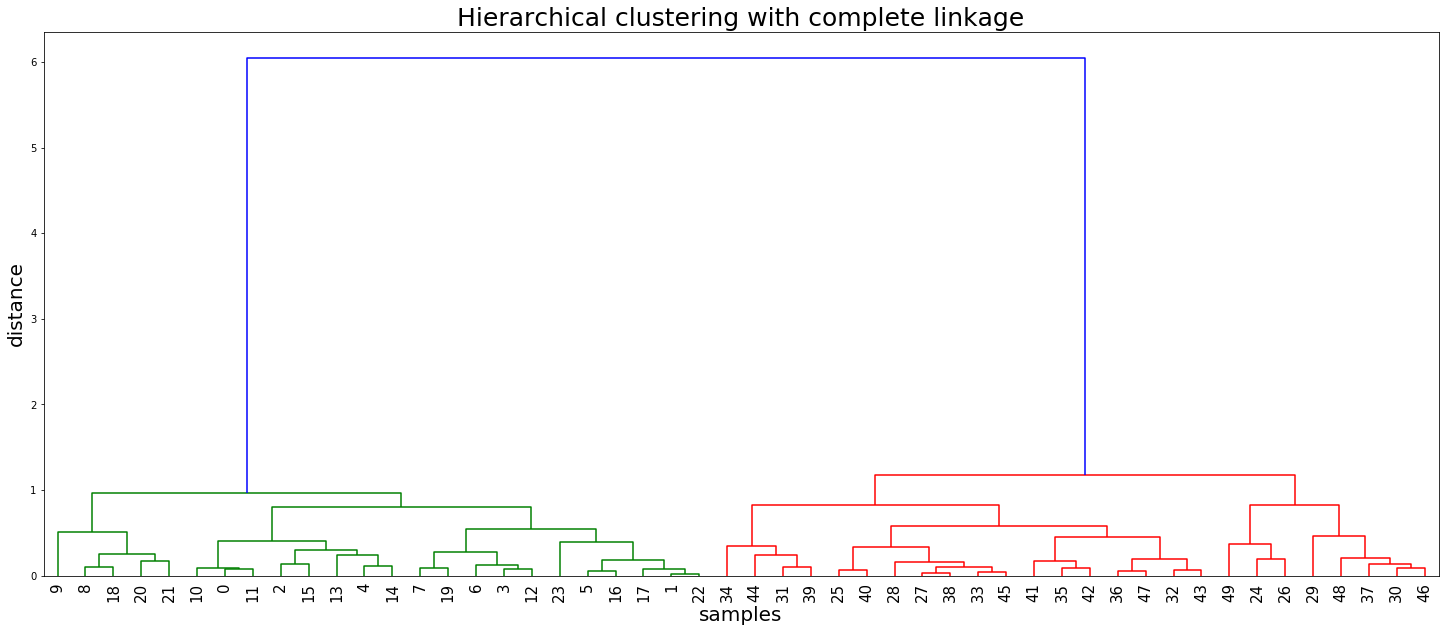

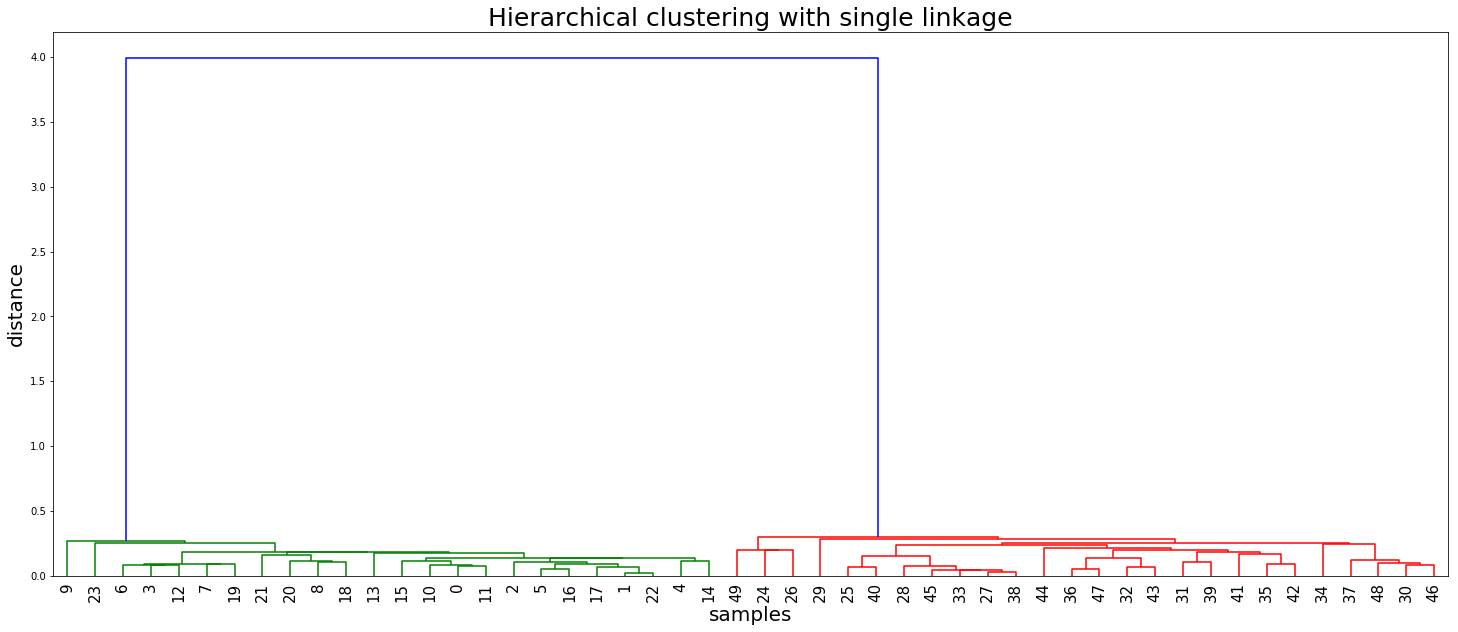

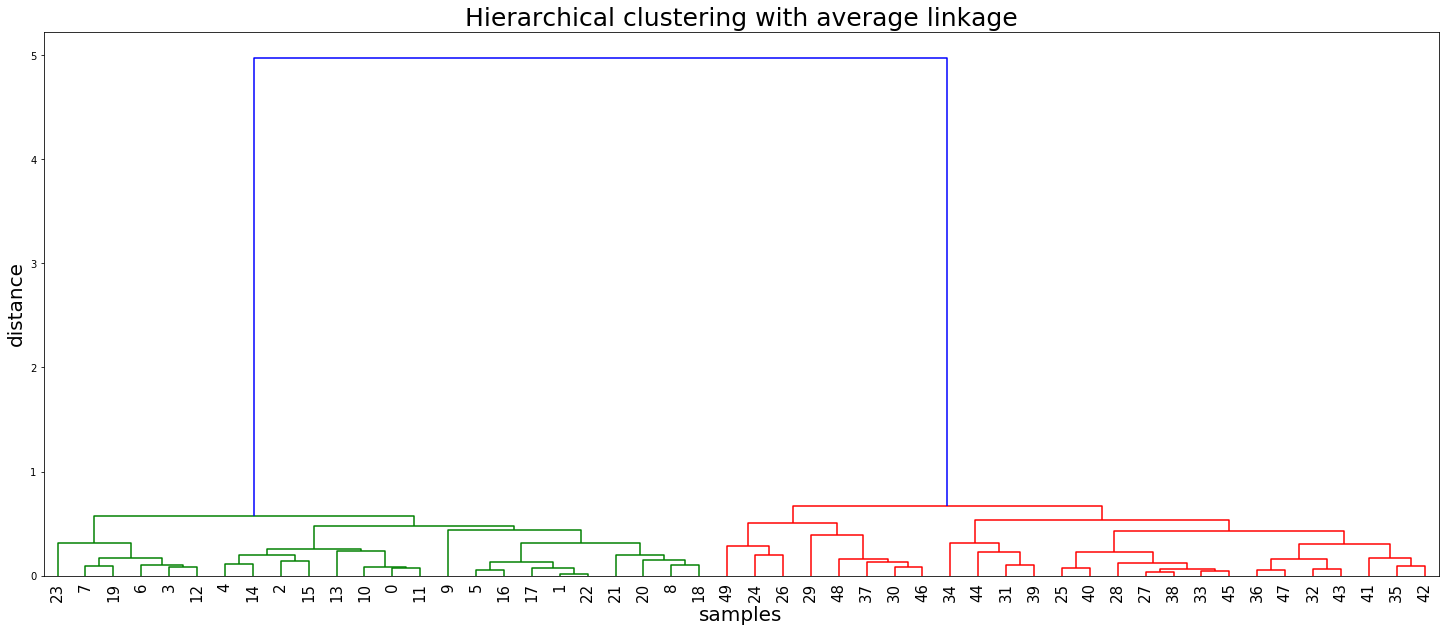

In [96]:
# Plot hc_complete dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical clustering with complete linkage', size=25)
plt.xlabel('samples', size=20)
plt.ylabel('distance', size=20)
dendrogram(hc_complete, 
           leaf_rotation=90, 
           leaf_font_size=15)
plt.show()

# Plot hc_single dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical clustering with single linkage', size=25)
plt.xlabel('samples', size=20)
plt.ylabel('distance', size=20)
dendrogram(hc_single, 
           leaf_rotation=90, 
           leaf_font_size=15)
plt.show()

# Plot hc_average dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical clustering with average linkage', size=25)
plt.xlabel('samples', size=20)
plt.ylabel('distance', size=20)
dendrogram(hc_average, 
           leaf_rotation=90, 
           leaf_font_size=15)
plt.show()

All linkage methods separate the observations into the two correct groups. However, they do so at a different height of the plot. Let's see what happens when we cut the dendrogram at height 0.5 for each method:

In [100]:
# Cut tree at height 0.5 for each linkage method
cutree_complete = cut_tree(hc_complete, height=[0.5])
cutree_single = cut_tree(hc_single, height=[0.5])
cutree_average = cut_tree(hc_average, height=[0.5])

# Print clusters obtained at height 0.5 for each linkage method
print('Clusters identifiead at height 0.5 with:' + '\n')
print('- Complete method: ' + '\n' + str(cutree_complete.T) + '\n')
print('- Single method: ' + '\n' + str(cutree_single.T) + '\n')
print('- Average method: ' + '\n' + str(cutree_average.T) + '\n')

Clusters identifiead at height 0.5 with:

- Complete method: 
[[0 1 0 2 0 1 2 2 3 4 0 0 2 0 0 0 1 1 3 2 3 3 1 1 5 6 5 6 6 7 7 8 9 6 8 9
  9 7 6 8 6 9 9 9 8 6 7 9 7 5]]

- Single method: 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]

- Average method: 
[[0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 2 3 2 3 3 4 4 5 3 3 5 3
  3 4 3 5 3 3 3 3 5 3 4 3 4 2]]



The single linkage method was the only that correctly identified the clusters at height 0.5 

Let's compute hierarchical clustering using correlation as the dissimilarity measure (and using complete linkage). For that we will need to simulate data with three features:

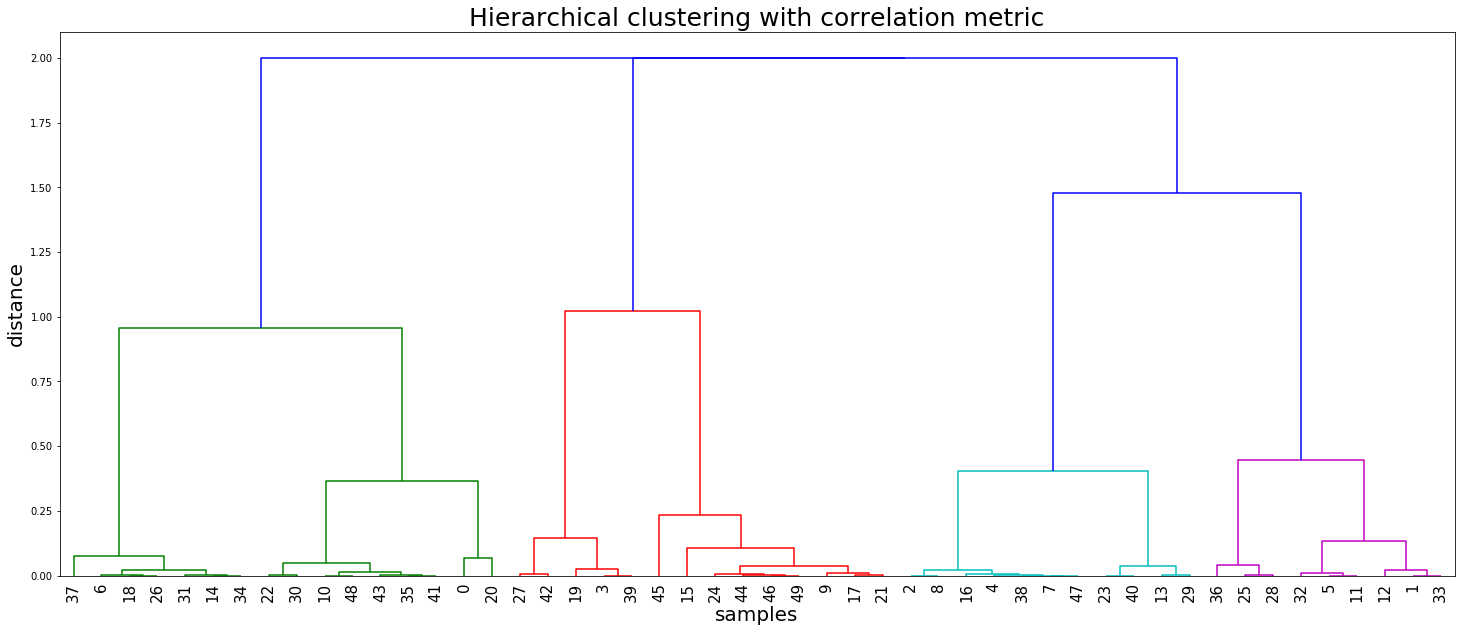

In [86]:
# Simulate data
np.random.seed(2)
X_3 = np.random.rand(50,3)

# Compute complete linkage with correlation metric
hc_correlation = linkage(X_3, 
                         method='complete', 
                         metric='correlation')

# Plot dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical clustering with correlation metric', size=25)
plt.xlabel('samples', size=20)
plt.ylabel('distance', size=20)
dendrogram(hc_correlation, 
           leaf_rotation=90, 
           leaf_font_size=15)
plt.show()